C:\Users\Administrator\AppData\Local\Temp\ipykernel_30172\2021078703.py:42: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


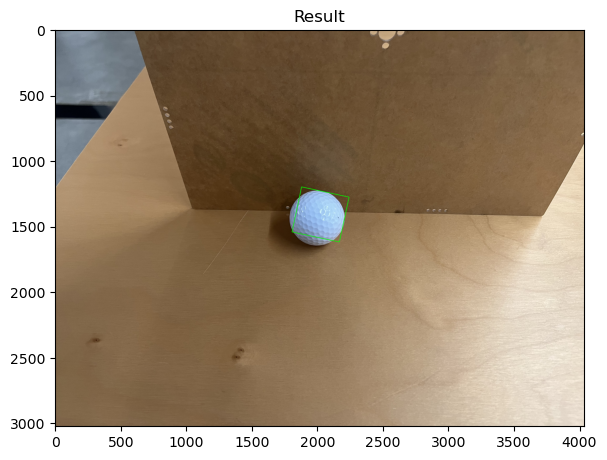

白色轮廓中心点： 2023 1412
白色轮廓中心点： 1383 -1052


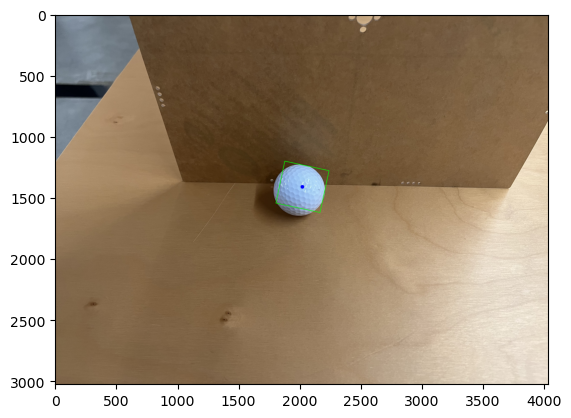

In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图片
dst = cv2.imread('img/golfball.jpg', 1)

hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

# 设定白色阈值
white_lower = np.array([0, 50, 200])
white_upper = np.array([179, 150, 255])

# 二值化筛选出白色
binary_white = cv2.inRange(hsv, white_lower, white_upper)

# plt.figure(figsize=(15, 15))

# plt.subplot(1, 2, 1)
# plt.imshow(binary_white, cmap='gray')
# plt.title('White')

# plt.show()

dst_white = dst.copy()
# 轮廓检测
contours, hierarchy = cv2.findContours(binary_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

detected_countours = []

def drawBox(dst, contours):
    # 筛选轮廓
    for i in range(len(contours)):
        # 轮廓面积
        area = cv2.contourArea(contours[i])
        if area < 5000:
            continue
        # 找到最小矩形
        rect = cv2.minAreaRect(contours[i])
        # 计算最小矩形的坐标
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        # 绘制最小矩形
        r = (abs(box[1][1]-box[0][1])/(box[3][0]-box[0][0]))
        if (r > 0.5 and r < 2):
            detected_countours.append(box)
    
drawBox(dst, contours)

for i in range(0, len(detected_countours)):
    cv2.drawContours(dst, [detected_countours[i]], 0, (0, 255, 0), 3)

plt.figure(figsize=(15, 15))

# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(dst_white, cv2.COLOR_BGR2RGB))
# plt.title('Green')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Result')

plt.show()

# 计算轮廓的中心点
def getCenter(contour):
    # 计算轮廓的矩
    M = cv2.moments(contour)
    if M['m00'] == 0:
        return 0, 0
    else:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        return cx, cy
    
white_x, white_y = getCenter(detected_countours[0])

print('白色轮廓中心点：', white_x, white_y)

def drawCenter(dst, x, y):
    cv2.circle(dst, (x, y), 15, (255, 0, 0), -1)

# 绘制中心点
drawCenter(dst, white_x, white_y)

# 坐标转换
def TransformCoordinate(x, y):
    x = x - 640
    y = 360 - y
    return x, y

white_x, white_y = TransformCoordinate(white_x, white_y)

print('白色轮廓中心点：', white_x, white_y)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
